In [2]:
import numpy as np
import pandas as pd 
from statsmodels.tsa.stattools import acf, pacf, adfuller
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./monthly-sunspots.csv')
df.fillna

df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


/tmp/ipykernel_34846/3457323024.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


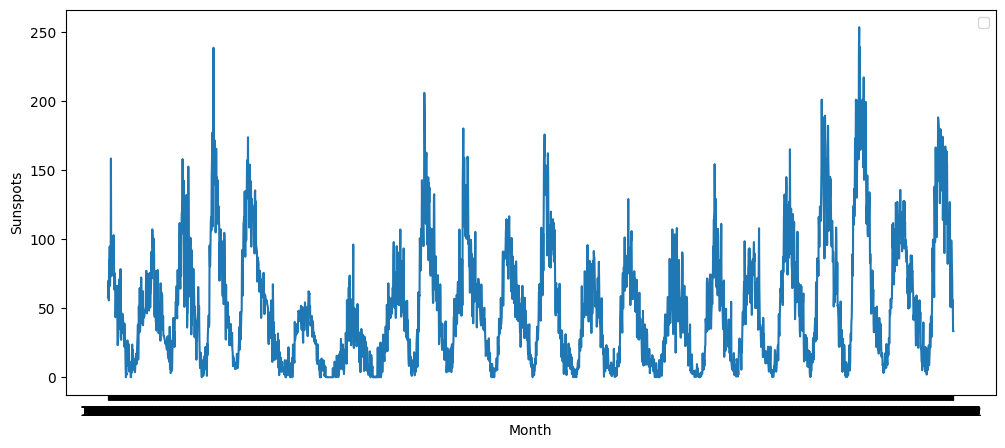

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['Month'], df['Sunspots'])
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.legend()
plt.show()

In [5]:
# What is the Augmented Dickey-Fuller (ADF) Test?
# The Augmented Dickey-Fuller (ADF) Test is a statistical test used to check whether a time series is stationary or not.

# 🔹 Why is Stationarity Important?
# A stationary time series has constant mean, variance, and autocorrelation over time.

# Most time series models (like AR, MA, and ARIMA) assume that the data is stationary.

# If the series is not stationary, we need to differentiate the data before applying models.



In [6]:
"""A stationary time series is one where the statistical 
properties remain constant over time—meaning its mean, 
variance, and autocorrelation structure do not change."""


adf_result = adfuller((df['Sunspots']).dropna())
# print(adf_result)
print(f'ADF Statistic :{adf_result[0]}')
print(f'p-value : {adf_result[1]}')

if adf_result[0] < 0.05:
    print('Time Series data is stationary')

# ADF Statistic :-9.567667511913074
# p-value : 2.3334521438663556e-16

ADF Statistic :-9.567667511913074
p-value : 2.3334521438663556e-16
Time Series data is stationary


In [7]:
import statsmodels.api as sm

Text(0.5, 1.0, 'PACF')

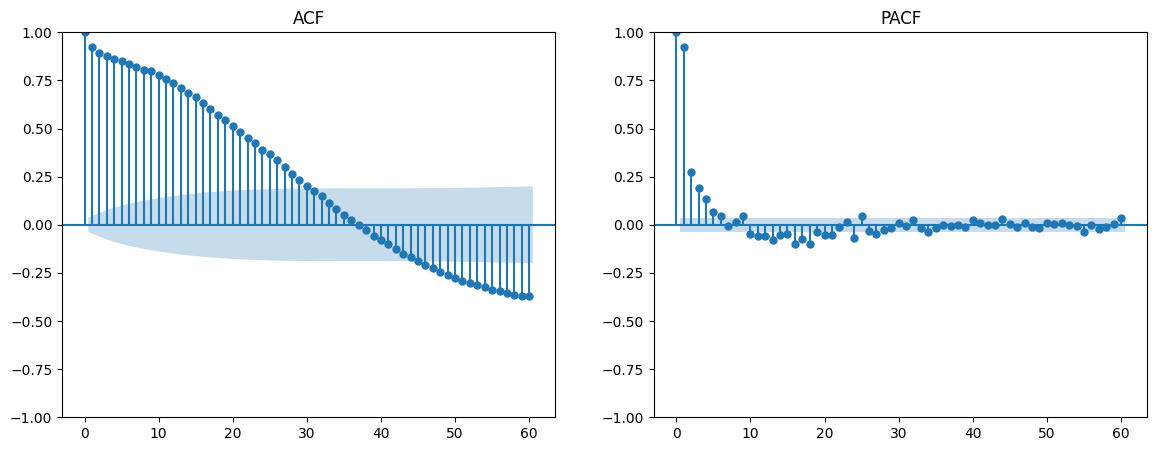

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sm.graphics.tsa.plot_acf(df['Sunspots'], lags=60, ax=ax[0])
ax[0].set_title("ACF")

sm.graphics.tsa.plot_pacf(df['Sunspots'], lags=60, ax=ax[1])
ax[1].set_title("PACF")




In [9]:
# 1️⃣ ACF Plot (Left)
# The ACF slowly decreases (gradual decay).

# This suggests strong autocorrelation and possible non-stationarity (even though your ADF test showed stationarity).

# This pattern indicates an AR or ARMA process in the data.

# 2️⃣ PACF Plot (Right)
# The PACF cuts off sharply after lag 2 or 3.

# This suggests an AR process of order ≈ 2 or 3 (AR(2) or AR(3)).

# It also suggests no strong MA component since the PACF drops off quickly.

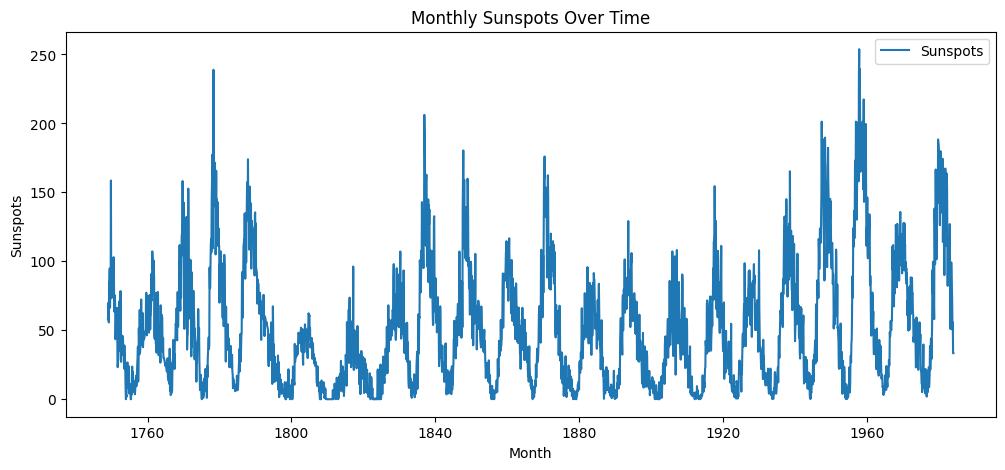

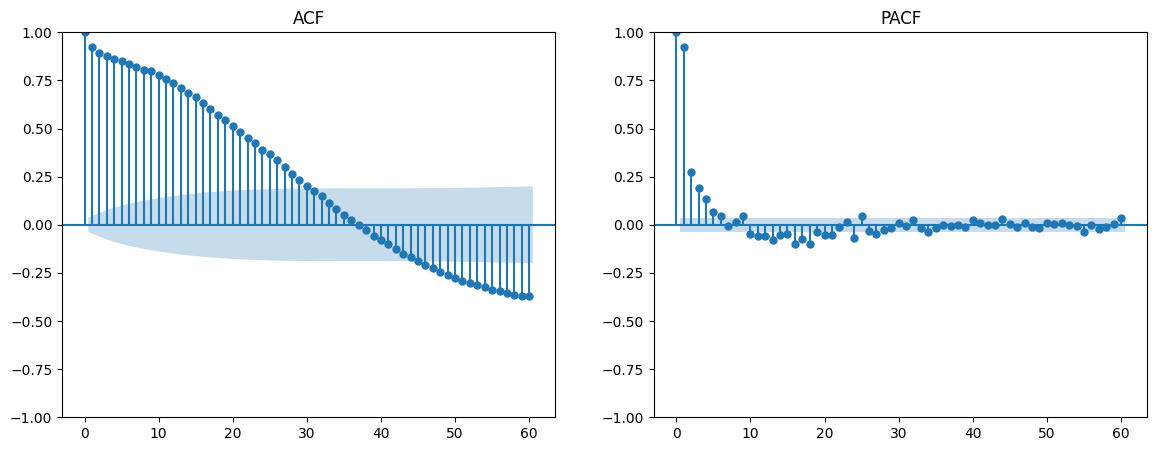

/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -11858.250
Date:                Mon, 31 Mar 2025   AIC                          23724.500
Time:                        16:05:22   BIC                          23748.278
Sample:                    01-01-1749   HQIC                         23733.079
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2659      6.806      7.532      0.000      37.925      64.606
ar.L1          0.6704      0.014     48.552      0.000       0.643       0.697
ar.L2          0.2722      0.013     20.287      0.0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset and ensure correct format
df = pd.read_csv("monthly-sunspots.csv")

# Convert 'Month' column to datetime and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Ensure 'Sunspots' is numeric
df['Sunspots'] = pd.to_numeric(df['Sunspots'], errors='coerce')

# Drop NaN values (if any)
df.dropna(inplace=True)

# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df, label="Sunspots")
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.title("Monthly Sunspots Over Time")
plt.legend()
plt.show()

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sm.graphics.tsa.plot_acf(df['Sunspots'], lags=60, ax=ax[0])
ax[0].set_title("ACF")
sm.graphics.tsa.plot_pacf(df['Sunspots'], lags=60, ax=ax[1])
ax[1].set_title("PACF")
plt.show()

# Fit AR(2) Model
model = ARIMA(df, order=(2, 0, 0))  # AR(2), No differencing, No MA terms
model_fit = model.fit()

# Print Model Summary
print(model_fit.summary())


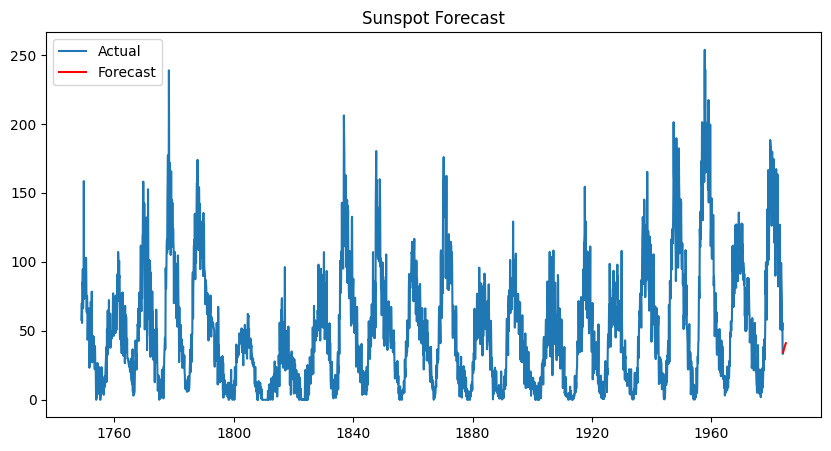

In [13]:
# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label="Actual")
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label="Forecast", color="red")
plt.title("Sunspot Forecast")
plt.legend()
plt.show()


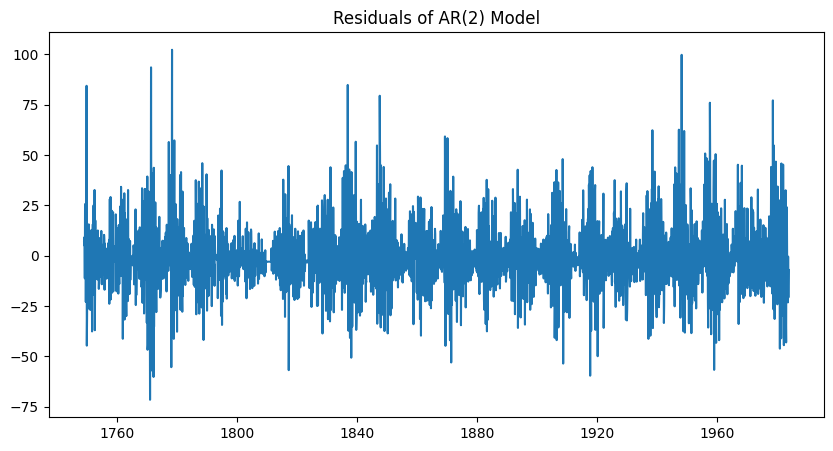

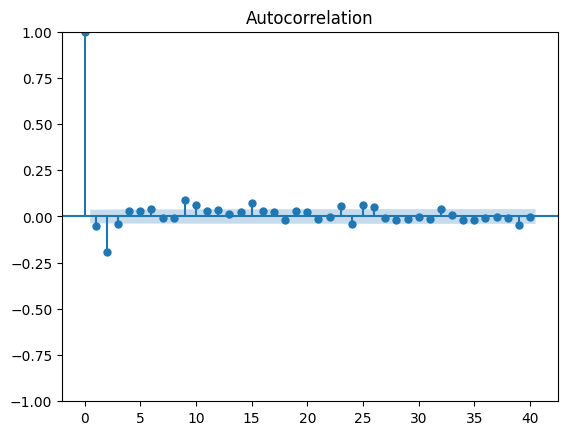

In [14]:
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals of AR(2) Model")
plt.show()

# ACF of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()


In [ ]:
'''Sunspot Forecast:

The actual data shows cyclical trends, which is expected for sunspot activity.

The red line for the forecast seems to align reasonably well with recent trends.

Residuals of AR(2) Model:

The residuals appear to be centered around zero but still show some patterns. Ideally, residuals should resemble white noise (random fluctuations with no pattern).

Autocorrelation of Residuals:

The autocorrelation function (ACF) of residuals suggests that most lag values fall within the confidence interval (shaded area), which is good.

However, some lags still show slight correlations, indicating that the model might not have captured all dependencies.'''

'Sunspot Forecast:\n\nThe actual data shows cyclical trends, which is expected for sunspot activity.\n\nThe red line for the forecast seems to align reasonably well with recent trends.\n\nResiduals of AR(2) Model:\n\nThe residuals appear to be centered around zero but still show some patterns. Ideally, residuals should resemble white noise (random fluctuations with no pattern).\n\nAutocorrelation of Residuals:\n\nThe autocorrelation function (ACF) of residuals suggests that most lag values fall within the confidence interval (shaded area), which is good.\n\nHowever, some lags still show slight correlations, indicating that the model might not have captured all dependencies.'

In [ ]:
# NEXT STEP

Ljung-Box test p-value: 1.0744385822719565e-29
Shapiro-Wilk test p-value: 3.799353441679052e-29


In [ ]:
'''Check Residuals: Run a normality test (e.g., Shapiro-Wilk test) and a Ljung-Box test to verify if residuals are independent.

Model Improvement:

Try increasing the AR order (p) to capture more lag dependencies.

Consider using an ARIMA model if differencing (d) is needed.

Test an SARIMA model if seasonality is present.

'''

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Get residuals
residuals = model_fit.resid

# Ljung-Box Test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test p-value:", lb_test["lb_pvalue"].values[0])

# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)


Ljung-Box test p-value: 1.0744385822719565e-29
Shapiro-Wilk test p-value: 3.799353441679052e-29


In [17]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Get residuals
residuals = model_fit.resid

# Ljung-Box Test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test p-value:", lb_test["lb_pvalue"].values[0])

# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)


Ljung-Box test p-value: 1.0744385822719565e-29
Shapiro-Wilk test p-value: 3.799353441679052e-29


In [ ]:
import itertools

best_aic = float("inf")
best_order = None
best_model = None

for p in range(1, 6):  # Testing AR(1) to AR(5)
    try:
        model = ARIMA(df['Sunspots'], order=(p, 0, 0))
        model_fit = model.fit()
        print(f'AR({p}) - AIC: {model_fit.aic}')
        
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = (p, 0, 0)
            best_model = model_fit
            
    except:
        continue

print(f"Best AR order: {best_order} with AIC {best_aic}")


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR(1) - AIC: 23939.774181656907


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR(2) - AIC: 23724.49959768521


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR(3) - AIC: 23624.36397857521


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR(4) - AIC: 23574.276866816173


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR(5) - AIC: 23564.644563065216
Best AR order: (5, 0, 0) with AIC 23564.644563065216


In [ ]:
'''
Ljung-Box Test (Residual Independence)
p-value = 1.07e-29 (very small)

❌ This means residuals are autocorrelated (not white noise), indicating your AR(2) model is missing some structure.

2. Shapiro-Wilk Test (Normality)
p-value = 3.79e-29 (very small)

❌ Residuals are not normally distributed, which suggests the model might not be the best fit.

3. AR Order Selection
AR(5) gave the lowest AIC (23564.64), better than AR(2).

 Next step: Fit an AR(5) model and check residuals again!
'''

'\nLjung-Box Test (Residual Independence)\np-value = 1.07e-29 (very small)\n\n❌ This means residuals are autocorrelated (not white noise), indicating your AR(2) model is missing some structure.\n\n2. Shapiro-Wilk Test (Normality)\np-value = 3.79e-29 (very small)\n\n❌ Residuals are not normally distributed, which suggests the model might not be the best fit.\n\n3. AR Order Selection\nAR(5) gave the lowest AIC (23564.64), better than AR(2).\n\n Next step: Fit an AR(5) model and check residuals again!\n'

In [ ]:
model_ar5 = ARIMA(df['Sunspots'], order=(5, 0, 0))
model_fit_ar5 = model_ar5.fit()

# Print summary
print(model_fit_ar5.summary())

/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -11775.322
Date:                Mon, 31 Mar 2025   AIC                          23564.645
Time:                        14:12:59   BIC                          23606.256
Sample:                    01-01-1749   HQIC                         23579.659
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2659      9.943      5.156      0.000      31.778      70.753
ar.L1          0.5848      0.014     40.461      0.000       0.556       0.613
ar.L2          0.1192      0.017      7.145      0.0

In [ ]:
# Check Residuals Again

In [ ]:
residuals_ar5 = model_fit_ar5.resid

# Ljung-Box Test
lb_test_ar5 = acorr_ljungbox(residuals_ar5, lags=[10], return_df=True)
print("Ljung-Box test p-value (AR5):", lb_test_ar5["lb_pvalue"].values[0])

# Shapiro-Wilk Test
shapiro_test_ar5 = shapiro(residuals_ar5)
print("Shapiro-Wilk test p-value (AR5):", shapiro_test_ar5.pvalue)


Ljung-Box test p-value (AR5): 9.421142219543434e-07
Shapiro-Wilk test p-value (AR5): 5.675983728034404e-29


In [ ]:
''' Ljung-Box Test (Residual Independence)
p-value = 9.42e-07 (still very small)

❌ Residuals are still autocorrelated, meaning the model is not fully capturing the time series dynamics.

2. Shapiro-Wilk Test (Normality)
p-value = 5.67e-29 (very small)

❌ Residuals are still not normally distributed, which means the model is not explaining all variability in the data.

'''

' Ljung-Box Test (Residual Independence)\np-value = 9.42e-07 (still very small)\n\n❌ Residuals are still autocorrelated, meaning the model is not fully capturing the time series dynamics.\n\n2. Shapiro-Wilk Test (Normality)\np-value = 5.67e-29 (very small)\n\n❌ Residuals are still not normally distributed, which means the model is not explaining all variability in the data.\n\n'

In [ ]:


# Try ARMA(5,1)
model_arma = ARIMA(df['Sunspots'], order=(5, 0, 1))
model_fit_arma = model_arma.fit()

# Print summary
print(model_fit_arma.summary())


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(5, 0, 1)   Log Likelihood              -11773.152
Date:                Mon, 31 Mar 2025   AIC                          23562.304
Time:                        14:13:04   BIC                          23609.860
Sample:                    01-01-1749   HQIC                         23579.464
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2653     10.473      4.895      0.000      30.739      71.792
ar.L1          1.0075      0.163      6.194      0.000       0.689       1.326
ar.L2         -0.1324      0.096     -1.378      0.1

In [ ]:
model_arima = ARIMA(df['Sunspots'], order=(5, 1, 1))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -11780.082
Date:                Mon, 31 Mar 2025   AIC                          23574.163
Time:                        14:13:06   BIC                          23615.772
Sample:                    01-01-1749   HQIC                         23589.177
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0320      0.235     -0.136      0.892      -0.492       0.428
ar.L2         -0.1364      0.096     -1.424      0.154      -0.324       0.051
ar.L3         -0.0863      0.067     -1.285      0.1

In [ ]:
import pickle
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define file path to save model
model_path = "sarima_model.pkl"

# Check if a saved model exists
if os.path.exists(model_path):
    print("Loading existing model...")
    with open(model_path, "rb") as f:
        model_fit_sarima = pickle.load(f)
else:
    print("Training new model...")
    # Fit SARIMA (p,d,q)(P,D,Q,s) with seasonal period 11 years (132 months)
    model_sarima = SARIMAX(df['Sunspots'], order=(5, 0, 1), seasonal_order=(1, 0, 1, 132))
    model_fit_sarima = model_sarima.fit(disp=False, maxiter=50)

    # Save the model
    with open(model_path, "wb") as f:
        pickle.dump(model_fit_sarima, f)

# Print summary and optimizer details
print(model_fit_sarima.summary())
print("MLE Optimization Results:", model_fit_sarima.mle_retvals)


Training new model...


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


: 

: 